# Predict automobile price using Machine Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/ASUS/Desktop/ml project/project 2 16 julanswer/AutoData.csv")
df

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [3]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

# EDA- Explanotory Data Analysis

- Lets begin some explanotory data analysis .we'll start by checking any missing value. 

- we can use seaborn to create a simple heatmap to see where we have missing data

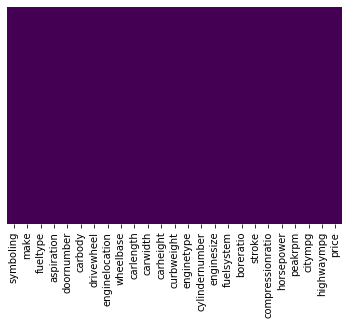

In [4]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

- since there is no color change in any part of the graph means that there is no null values.

- let's continue on by visualizing some more data .

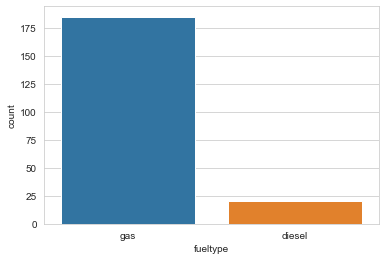

In [6]:
sns.set_style('whitegrid')
sns.countplot(x= 'fueltype', data = df)

- by this we can say that ,the gas fueltype car sell more as compare to diesel

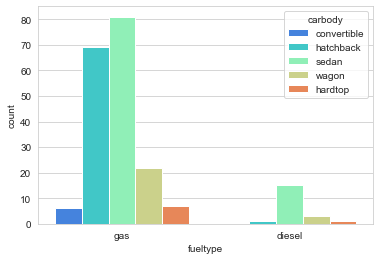

In [7]:
sns.set_style('whitegrid')
sns.countplot(x= 'fueltype',hue = 'carbody', data = df, palette = 'rainbow')

- by this we can say that , the sedan is the most selling car type in both gas as well as diesel varient.

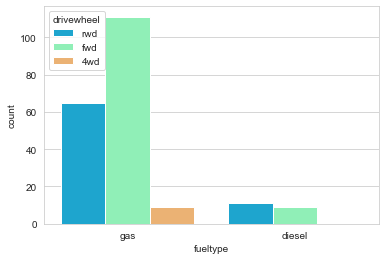

In [8]:
sns.set_style('whitegrid')
sns.countplot(x= 'fueltype',hue = 'drivewheel', data = df, palette = 'rainbow')

- by this we can say that, the forward wheel drive is popular in gas varient of car but in diesel type rare wheel drive is more popular.

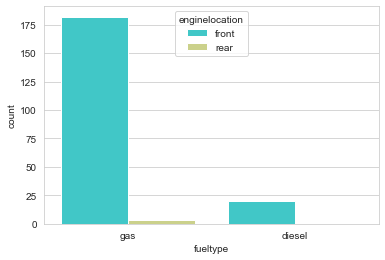

In [9]:
sns.set_style('whitegrid')
sns.countplot(x= 'fueltype',hue = 'enginelocation', data = df, palette = 'rainbow')

- by this we can say that ,the front engine location is more popular in both gas as well as diesel varient cars.

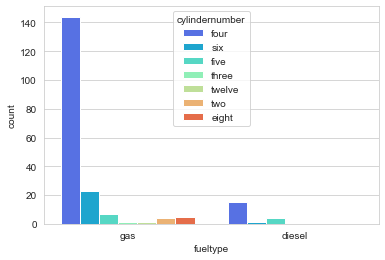

In [10]:
sns.set_style('whitegrid')
sns.countplot(x= 'fueltype',hue = 'cylindernumber', data = df, palette = 'rainbow')

- by this we can say that , the four cilender cars are more popluar than other in both fuel type cars.

### Price : Target Variable

In [11]:
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

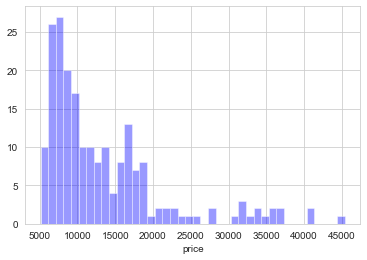

In [12]:
sns.distplot(df['price'],kde = False ,color = 'blue', bins = 40)

by this distplot we can say that, the cars have price range between 5000-20000 are more sold as compare to other.

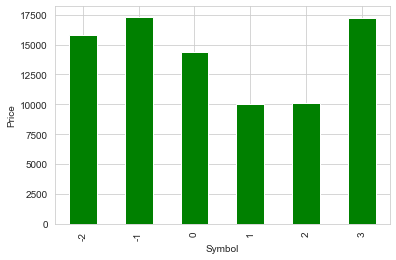

In [13]:
barG = df[['symboling','price']].groupby("symboling").mean().plot(kind='bar',legend = False,color = 'green')
barG.set_xlabel("Symbol")
barG.set_ylabel("Price")
plt.show()

In [14]:
df.make.values[0:10]

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 100ls', 'audi 5000', 'audi 4000',
       'audi 5000s (diesel)'], dtype=object)

- It is observed that make consists of two parts 'car company' and 'Car Model' seperated by ' '.

In [5]:
df['company'] = df.make.str.split(' ').str.get(0).str.upper()

In [16]:
df['company'].unique() 

array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAXDA', 'MAZDA', 'BUICK', 'MERCURY',
       'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE',
       'PORCSHCE', 'RENAULT', 'SAAB', 'SUBARU', 'TOYOTA', 'TOYOUTA',
       'VOKSWAGEN', 'VOLKSWAGEN', 'VW', 'VOLVO'], dtype=object)

In [6]:
df['company'] = df['company'].replace(['MAXDA'], 'MAZDA')
df['company'] = df['company'].replace(['PORCSHCE'], 'PORSCHE')
df['company'] = df['company'].replace(['TOYOUTA'], 'TOYOTA')
df['company'] = df['company'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')

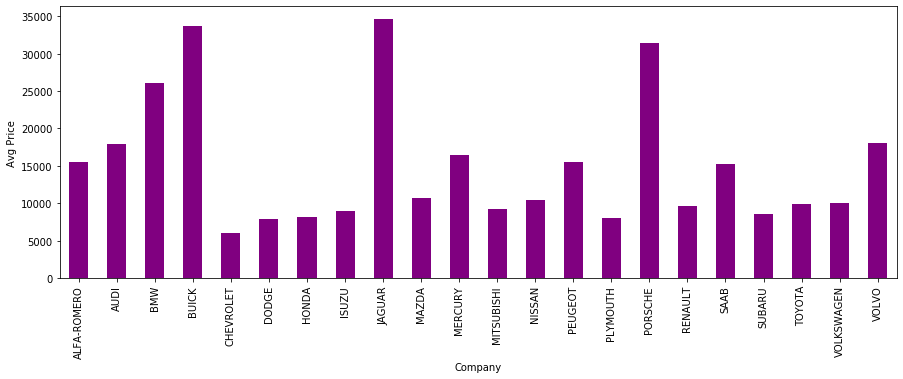

In [7]:
df_avg = df[['company','price']].groupby("company", as_index = False).mean().rename(columns={'price':'Avgprice'})
barG = df_avg.plot(x = 'company', kind='bar',legend = False, sort_columns = True, figsize = (15,5), color= 'purple')
barG.set_xlabel("Company")
barG.set_ylabel("Avg Price")
plt.show()

- by this plot we can understand the average price of a company model.

In [8]:
df = df.merge(df_avg, on = 'company')
df['Car_cat'] = df['Avgprice'].apply(lambda x : "Budget" if x < 12000 else ("Mid_Range" if 12000 <= x < 24000 else "Luxury"))


In [9]:
df['mileage'] = df['citympg']*0.6 + df['highwaympg']*0.4

- on an average people run car in city more as compare to highway.
- the average milage is a average of preportion of city milage and highway milage.

In [10]:
auto = df.copy()

In [11]:
auto.drop(['make','symboling','doornumber','enginelocation','carheight','fuelsystem','stroke','compressionratio','peakrpm','citympg','highwaympg','company','Avgprice'], axis = 1, inplace = True)

In [23]:
auto

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,Car_cat,mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,Mid_Range,23.4
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,Mid_Range,23.4
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,Mid_Range,21.8
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,Mid_Range,26.4
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,Mid_Range,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,109.1,188.8,68.9,2952,ohc,four,141,3.78,114,16845.0,Mid_Range,25.0
201,gas,turbo,sedan,rwd,109.1,188.8,68.8,3049,ohc,four,141,3.78,160,19045.0,Mid_Range,21.4
202,gas,std,sedan,rwd,109.1,188.8,68.9,3012,ohcv,six,173,3.58,134,21485.0,Mid_Range,20.0
203,diesel,turbo,sedan,rwd,109.1,188.8,68.9,3217,ohc,six,145,3.01,106,22470.0,Mid_Range,26.4


### Converting Categorical Variables


In [12]:
auto = pd.get_dummies(auto, drop_first = True)
auto

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,fueltype_gas,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,Car_cat_Luxury,Car_cat_Mid_Range
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,23.4,1,...,0,0,0,1,0,0,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,23.4,1,...,0,0,0,1,0,0,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,21.8,1,...,1,0,0,0,1,0,0,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,26.4,1,...,0,0,0,1,0,0,0,0,0,1
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,19.6,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,16845.0,25.0,1,...,0,0,0,1,0,0,0,0,0,1
201,109.1,188.8,68.8,3049,141,3.78,160,19045.0,21.4,1,...,0,0,0,1,0,0,0,0,0,1
202,109.1,188.8,68.9,3012,173,3.58,134,21485.0,20.0,1,...,1,0,0,0,1,0,0,0,0,1
203,109.1,188.8,68.9,3217,145,3.01,106,22470.0,26.4,0,...,0,0,0,0,1,0,0,0,0,1


- ML aglorithm's did not understand categorical variables.

### Correlation

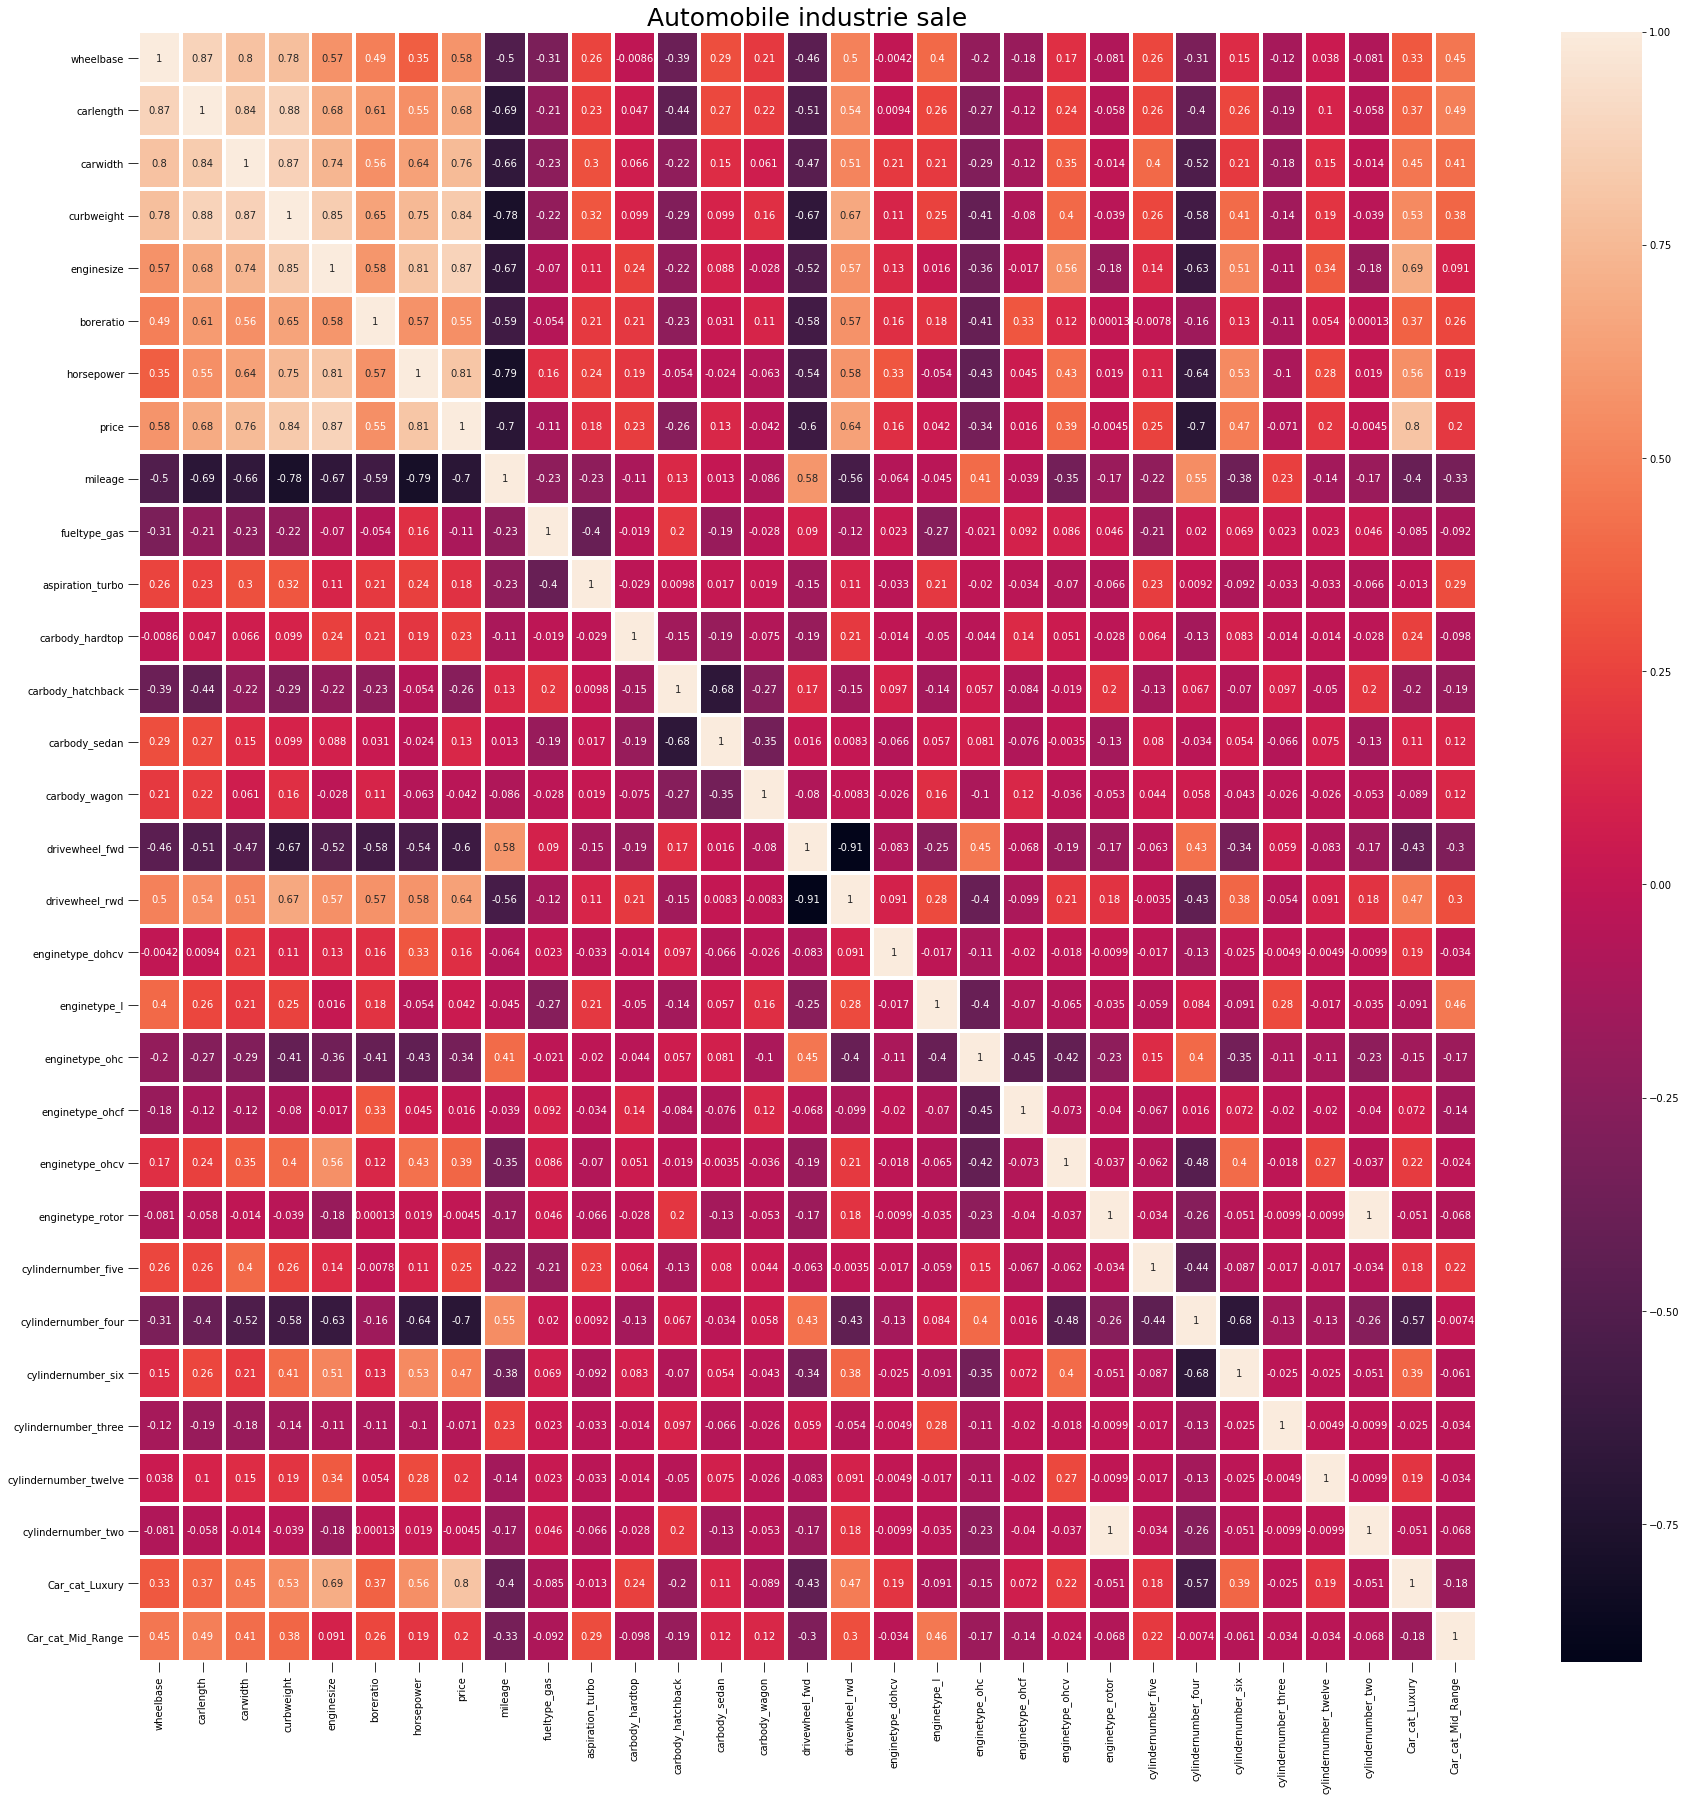

In [13]:
plt.figure(figsize=(30,30))
ax = sns.heatmap(auto.corr(), annot = True, linewidth = 3)
ax.tick_params(size = 10, labelsize = 10)
plt.title("Automobile industrie sale", fontsize = 25)
plt.show()

- by this we can pick best variable which is correlated to price.

## Linear regression model

> The simple linear regression model 

In [14]:
from sklearn.linear_model import LinearRegression
X = auto['enginesize'].values.reshape(-1, 1)
Y = auto['price'].values.reshape(-1, 1)
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)
pre = linear_regressor.predict(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=51)
 
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (164, 1)
Shape of y_train =  (164, 1)
Shape of X_test =  (41, 1)
Shape of y_test =  (41, 1)


+ Y_predict -

In [16]:
Y_pred = linear_regressor.predict(X_test)
Y_pred.shape

(41, 1)

In [17]:
Y_pred

array([[31235.98390486],
       [22347.96783602],
       [12118.36443604],
       [14801.53909833],
       [18155.50742619],
       [10105.98343932],
       [15640.03118029],
       [12453.76126882],
       [24528.04724913],
       [ 7087.41194424],
       [ 8261.30085899],
       [ 7422.80877703],
       [ 8428.99927539],
       [ 7255.11036063],
       [10441.3802721 ],
       [14801.53909833],
       [12453.76126882],
       [ 7422.80877703],
       [16310.82484586],
       [ 7087.41194424],
       [15472.3327639 ],
       [12453.76126882],
       [22683.36466881],
       [18993.99950816],
       [15640.03118029],
       [10273.68185571],
       [12453.76126882],
       [ 8428.99927539],
       [14130.74543275],
       [10105.98343932],
       [19497.09475734],
       [ 7422.80877703],
       [12453.76126882],
       [ 7087.41194424],
       [15640.03118029],
       [12453.76126882],
       [ 8428.99927539],
       [13795.34859997],
       [ 9267.49135735],
       [20670.98367209],


+ r2 value -

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,Y_pred)

0.7301456353708734

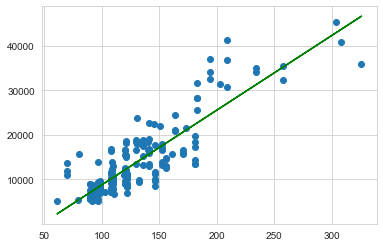

In [30]:
plt.scatter(X, Y)
plt.plot(X, pre, color='green')
plt.show()

- by this plot the data point's and the pridicted line

> Mutiple linear rigression model

In [31]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(auto, test_size=0.2, random_state=51)
 

- scaling the values for the better understanding by the model.

In [32]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [33]:
import warnings
warnings.filterwarnings('ignore')

num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']

df_train[num_vars] = sc.fit_transform(df_train[num_vars])

In [34]:
X_train = df_train.drop('price', axis=1)
y_train = df_train['price']
 
print('Shape of X = ', X_train.shape)
print('Shape of y = ', y_train.shape) 

Shape of X =  (164, 30)
Shape of y =  (164,)


- RFE -Recursive feature elimination


In [35]:
from sklearn.feature_selection import RFE

In [36]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

In [37]:
X_train

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,mileage,fueltype_gas,aspiration_turbo,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,Car_cat_Luxury,Car_cat_Mid_Range
108,0.620991,0.680597,0.675000,0.662917,0.343396,0.828571,0.195833,0.423077,0,1,...,0,0,0,1,0,0,0,0,0,1
88,0.282799,0.467164,0.425000,0.354926,0.184906,0.450000,0.283333,0.307692,1,0,...,0,0,0,1,0,0,0,0,0,0
58,0.253644,0.416418,0.450000,0.392552,0.071698,0.564286,0.362500,0.115385,1,0,...,0,1,0,0,0,0,0,1,0,0
13,0.425656,0.532836,0.375000,0.495345,0.388679,0.550000,0.304167,0.252747,1,0,...,0,0,0,0,1,0,0,0,1,0
134,0.364431,0.679104,0.516667,0.472847,0.226415,0.000000,0.258333,0.252747,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.300292,0.485075,0.425000,0.450737,0.177358,0.771429,0.262500,0.230769,1,1,...,0,0,0,1,0,0,0,0,0,0
16,0.492711,0.786567,0.633333,0.733902,0.558491,0.771429,0.558333,0.104396,1,0,...,0,0,0,0,1,0,0,0,1,0
197,0.516035,0.711940,0.575000,0.602793,0.301887,0.885714,0.275000,0.302198,1,0,...,0,0,0,1,0,0,0,0,0,1
201,0.655977,0.711940,0.708333,0.605508,0.301887,0.885714,0.466667,0.186813,1,1,...,0,0,0,1,0,0,0,0,0,1


In [38]:
linear_regressor.fit(X_train, y_train)

rfe = RFE(linear_regressor, 10)  
rfe = rfe.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 19),
 ('carlength', False, 18),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 6),
 ('boreratio', False, 8),
 ('horsepower', True, 1),
 ('mileage', False, 4),
 ('fueltype_gas', False, 15),
 ('aspiration_turbo', False, 17),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 16),
 ('drivewheel_rwd', False, 21),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 20),
 ('enginetype_ohc', False, 10),
 ('enginetype_ohcf', False, 9),
 ('enginetype_ohcv', False, 13),
 ('enginetype_rotor', False, 14),
 ('cylindernumber_five', False, 3),
 ('cylindernumber_four', False, 2),
 ('cylindernumber_six', False, 5),
 ('cylindernumber_three', False, 11),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 12),
 ('Car_cat_Luxury', True, 1),
 ('Car_cat_Mid_Range', False, 7)]

In [40]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'horsepower', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginetype_dohcv', 'cylindernumber_twelve', 'Car_cat_Luxury'],
      dtype='object')

In [41]:
X_train_rfe = X_train[col]

In [42]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [43]:
linear_regressor = sm.OLS(y_train,X_train_rfe).fit()

- VIF

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,48.68
6,carbody_sedan,12.05
5,carbody_hatchback,11.05
2,curbweight,7.66
7,carbody_wagon,5.96
1,carwidth,4.96
3,horsepower,3.85
4,carbody_hardtop,2.80
10,Car_cat_Luxury,1.74
8,enginetype_dohcv,1.39


In [45]:
X_train_new1 = X_train_rfe.drop(["cylindernumber_twelve"], axis = 1)

In [46]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)
linear_regressor = sm.OLS(y_train,X_train_lm).fit()  
print(linear_regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     233.3
Date:                Thu, 24 Sep 2020   Prob (F-statistic):           5.56e-85
Time:                        06:29:23   Log-Likelihood:                 248.61
No. Observations:                 164   AIC:                            -477.2
Df Residuals:                     154   BIC:                            -446.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0238      0.03

In [47]:
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,48.19
6,carbody_sedan,11.96
5,carbody_hatchback,11.01
2,curbweight,7.63
7,carbody_wagon,5.91
1,carwidth,4.96
3,horsepower,3.58
4,carbody_hardtop,2.80
9,Car_cat_Luxury,1.73
8,enginetype_dohcv,1.36


In [48]:
X_train_new2 = X_train_new1.drop(["carbody_sedan"], axis = 1)

In [49]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     235.0
Date:                Thu, 24 Sep 2020   Prob (F-statistic):           1.43e-82
Time:                        06:29:23   Log-Likelihood:                 239.73
No. Observations:                 164   AIC:                            -461.5
Df Residuals:                     155   BIC:                            -433.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0855      0.01

In [50]:
X_train_new3 = X_train_new2.drop(["carbody_hardtop"], axis = 1)

In [51]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new3)
linear_regressor = sm.OLS(y_train,X_train_lm).fit()
print(linear_regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     270.3
Date:                Thu, 24 Sep 2020   Prob (F-statistic):           8.37e-84
Time:                        06:29:23   Log-Likelihood:                 239.73
No. Observations:                 164   AIC:                            -463.5
Df Residuals:                     156   BIC:                            -438.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0856      0.01

In [52]:
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.04
2,curbweight,7.47
1,carwidth,4.59
3,horsepower,3.47
7,Car_cat_Luxury,1.70
6,enginetype_dohcv,1.35
5,carbody_wagon,1.32
4,carbody_hatchback,1.23


In [53]:
X_train_new4 = X_train_new3.drop(["curbweight"], axis = 1)

In [54]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new4)
linear_regressor = sm.OLS(y_train,X_train_lm).fit()
print(linear_regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     290.2
Date:                Thu, 24 Sep 2020   Prob (F-statistic):           2.91e-82
Time:                        06:29:23   Log-Likelihood:                 232.95
No. Observations:                 164   AIC:                            -451.9
Df Residuals:                     157   BIC:                            -430.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0876      0.01

In [55]:
X_train_new5 = X_train_new4.drop(["carbody_wagon"], axis = 1)

In [56]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new5)
linear_regressor = sm.OLS(y_train,X_train_lm).fit()
print(linear_regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     348.7
Date:                Thu, 24 Sep 2020   Prob (F-statistic):           2.10e-83
Time:                        06:29:23   Log-Likelihood:                 232.59
No. Observations:                 164   AIC:                            -453.2
Df Residuals:                     158   BIC:                            -434.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0896      0.01

In [57]:
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.76
2,horsepower,2.38
1,carwidth,1.98
5,Car_cat_Luxury,1.63
4,enginetype_dohcv,1.17
3,carbody_hatchback,1.12


In [58]:
X_train_new6 = X_train_new5.drop(["enginetype_dohcv"], axis = 1)

In [59]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new6)
linear_regressor = sm.OLS(y_train,X_train_lm).fit()
print(linear_regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     372.6
Date:                Thu, 24 Sep 2020   Prob (F-statistic):           1.25e-79
Time:                        06:29:23   Log-Likelihood:                 220.41
No. Observations:                 164   AIC:                            -430.8
Df Residuals:                     159   BIC:                            -415.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0757      0.01

In [60]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']

df_test[num_vars] = sc.fit_transform(df_test[num_vars])

In [61]:
X_test = df_test.drop('price', axis=1)
y_test = df_test['price']
 
print('Shape of X = ', X_test.shape)
print('Shape of y = ', y_test.shape) 

Shape of X =  (41, 30)
Shape of y =  (41,)


In [62]:
X_test_new = X_test[['carwidth', 'horsepower', 'Car_cat_Luxury', 'carbody_hatchback']]

import statsmodels.api as sm
X_test_new = sm.add_constant(X_test_new)

In [63]:
X_test_new.head()

,const,carwidth,horsepower,Car_cat_Luxury,carbody_hatchback
72,1.0,0.884615,0.657895,1,0
101,1.0,0.371795,0.638158,0,0
107,1.0,0.615385,0.276316,0,0
7,1.0,1.000000,0.361842,0,0
124,1.0,0.346154,0.592105,0,1


In [64]:
X_test_new

,const,carwidth,horsepower,Car_cat_Luxury,carbody_hatchback
72,1.0,0.884615,0.657895,1,0
101,1.0,0.371795,0.638158,0,0
107,1.0,0.615385,0.276316,0,0
7,1.0,1.000000,0.361842,0,0
124,1.0,0.346154,0.592105,0,1
10,1.0,0.153846,0.302632,1,0
194,1.0,0.461538,0.388158,0,0
63,1.0,0.371795,0.059211,0,0
127,1.0,0.179487,1.000000,1,0
21,1.0,0.025641,0.085526,0,1


In [65]:
X_test

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,mileage,fueltype_gas,aspiration_turbo,...,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,Car_cat_Luxury,Car_cat_Mid_Range
72,0.427350,0.742204,0.884615,1.000000,1.000000,0.632184,0.657895,0.000000,1,0,...,1,0,0,0,0,0,0,0,1,0
101,0.589744,0.771310,0.371795,0.683816,0.631944,0.597701,0.638158,0.072848,1,0,...,1,0,0,0,1,0,0,0,0,0
107,0.910256,0.875260,0.615385,0.643623,0.208333,0.632184,0.276316,0.139073,1,0,...,0,0,0,1,0,0,0,0,0,1
7,0.820513,1.000000,1.000000,0.608253,0.319444,0.321839,0.361842,0.152318,1,0,...,0,0,1,0,0,0,0,0,0,1
124,0.397436,0.594595,0.346154,0.535370,0.458333,0.781609,0.592105,0.139073,1,1,...,0,0,0,1,0,0,0,0,0,0
10,0.623932,0.669439,0.153846,0.308682,0.125000,0.678161,0.302632,0.284768,1,0,...,0,0,0,1,0,0,0,0,1,0
194,0.756410,0.918919,0.461538,0.585745,0.354167,1.000000,0.388158,0.271523,1,0,...,0,0,0,1,0,0,0,0,0,1
63,0.521368,0.690229,0.371795,0.334405,0.222222,0.551724,0.059211,0.715232,0,0,...,0,0,0,1,0,0,0,0,0,0
127,0.123932,0.505198,0.179487,0.502144,0.722222,0.954023,1.000000,0.112583,1,0,...,0,0,0,0,1,0,0,0,1,0
21,0.303419,0.264033,0.025641,0.030547,0.000000,0.068966,0.085526,0.721854,1,0,...,0,0,0,1,0,0,0,0,0,0


- y_predict

In [66]:
y_pred = linear_regressor.predict(X_test_new)

In [67]:
y_pred

72     0.466320
101    0.310475
107    0.250762
7      0.419856
124    0.568785
10     0.067749
194    0.241687
63     0.078335
127    0.356359
21     0.253328
89    -0.029796
36    -0.006837
23     0.343019
50     0.271302
42     0.150835
4      0.208378
86     0.092219
35    -0.002343
203    0.296970
45    -0.036144
65     0.208087
59     0.416856
67     0.372919
181    0.321027
196    0.241687
189    0.043575
175    0.437960
79     0.343019
131    0.437177
145    0.152892
14     0.214869
31     0.278925
176    0.152198
121   -0.032434
200    0.318074
123    0.056272
166    0.378385
199    0.368308
90    -0.066727
178    0.673899
104    0.680248
dtype: float64

- r2 value

In [68]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.019947048275435142

Text(0, 0.5, 'Prediction')

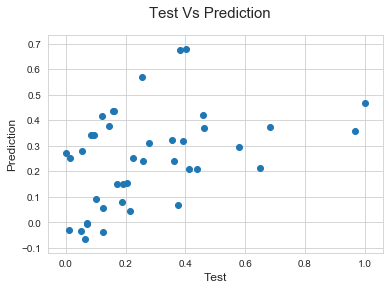

In [69]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('Test Vs Prediction', fontsize=15)           
plt.xlabel('Test', fontsize=12)                          
plt.ylabel('Prediction', fontsize=12)               

#### We can see that the equation of our best fitted line is:

 price = 0.3505 carwidth + 0.4010 horsepower + 0.2858 Car_cat_Luxury -0.0318  carbody_hatchback -0.0757     

- these are some factors that drive price-
  >carwidth, horsepower and car_category_luxury are +ve.
  
  >carbody_hatchback and constant are -ve.